In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [27]:
import seaborn as  sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
data.groupby(['Sex'])['Survived'].value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

<Axes: xlabel='Fare', ylabel='Survived'>

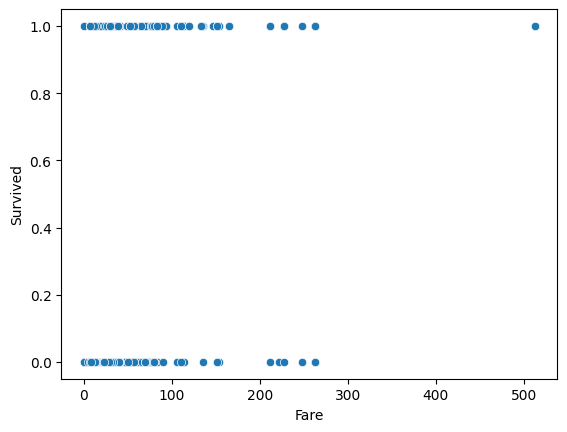

In [37]:
sns.scatterplot(x='Fare', y='Survived', data=data)

<Axes: xlabel='Pclass', ylabel='Survived'>

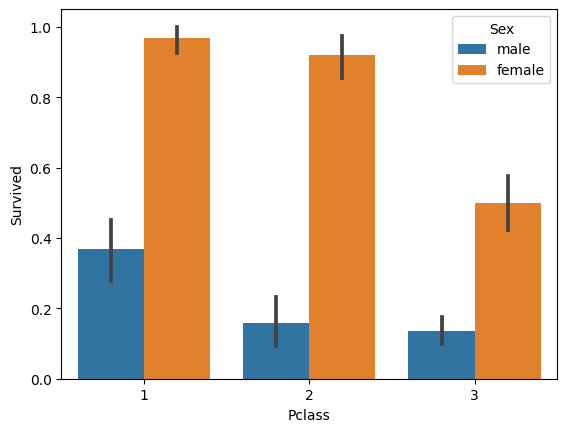

In [41]:
sns.barplot(x = 'Pclass', y = 'Survived', data=data, hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

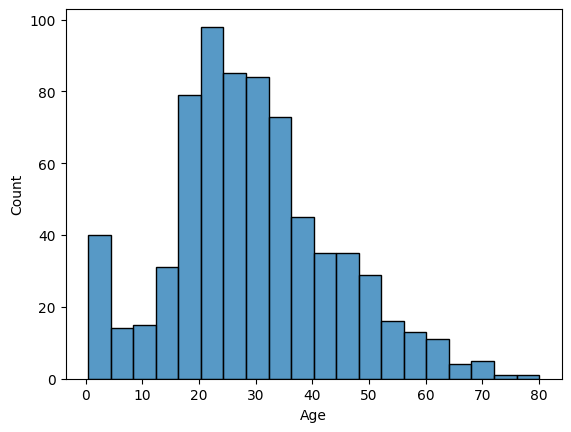

In [43]:
sns.histplot(x = 'Age' , data = data) 

In [132]:
data_clean_1 = data_clean.copy()

In [133]:
data_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [140]:
data_clean_1.loc[data_clean_1['Age'].isna(), 'Age'] = np.random.randint(20, 36, data_clean_1[data_clean_1['Age'].isna()].shape[0])

In [138]:
data_clean_1 = data.drop(columns = ['PassengerId', 'Name','Cabin', 'Embarked', 'Ticket'], axis = 1)

In [136]:
data_clean_1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [141]:
data_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [94]:
sex_encode = {'male' : 0, 'female' : 1}

In [142]:
data_clean_1['Sex'] = data_clean_1['Sex'].replace(sex_encode)

In [106]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [100]:
X = data_clean_1.drop(columns = ['Survived'])

In [ ]:
y = data_clean['Survived']

In [104]:
clf = RandomForestClassifier(random_state = 42)

In [109]:
X_train , X_val , y_train , y_val = train_test_split(X,y , test_size = .2, random_state = 42)

In [110]:
X_train.shape , X_val.shape , y_train.shape , y_val.shape

((712, 6), (179, 6), (712,), (179,))

In [114]:
cv_params = { 'max_depth' : [4, 8, None],
              'max_features' : [0.2, 0.6],
            'max_samples' : [0.7],
             'min_samples_leaf' : [1,2],
             'min_samples_split' : [2,3],
            'n_estimators' : [50, 100,200]
}

In [116]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

clf_cv = GridSearchCV(clf, cv_params, scoring = scoring, cv = 5  , refit = 'accuracy')

In [119]:
%%time
clf_cv.fit(X, y)

CPU times: user 1min 52s, sys: 641 ms, total: 1min 53s
Wall time: 1min 53s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 8, None], 'max_features': [0.2, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200]},
             refit='accuracy',
             scoring={'recall', 'f1', 'accuracy', 'precision'})

In [122]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [123]:
clf_cv.best_estimator_

RandomForestClassifier(max_depth=8, max_features=0.6, max_samples=0.7,
                       min_samples_leaf=2, n_estimators=200, random_state=42)

In [124]:
clf_cv.best_score_

0.8260875023539012

In [ ]:
y_pred = clf_cv.best_estimator_.predict(X_val)


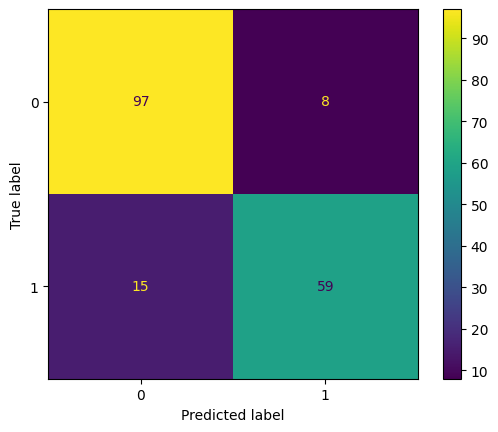

In [162]:
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot();

In [216]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [217]:
test_1 = test.drop(columns = ['PassengerId', 'Name','Cabin', 'Embarked', 'Ticket'], axis = 1)

In [218]:
test_1.loc[test_1['Age'].isna(), 'Age'] = np.random.randint(20, 36, test_1[test_1['Age'].isna()].shape[0])

In [219]:
test_1

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,32.0,0,0,8.0500


In [220]:
test_1 = test_1.fillna(69)

In [221]:
test_1['Sex'] = test_1['Sex'].replace(sex_encode)

In [222]:
 w = clf_cv.best_estimator_.predict(test_1)

In [223]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': w})
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!
